Ying Lin's Milestone 2

## Importing libraries and dataset

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv("test_reduced.csv")
train_df = pd.read_csv("train_reduced.csv")

In [5]:
print (f"The shape of train_df is {train_df.shape}")
train_df.head()
# first column (index) was read as a column
train_df = train_df.iloc[:,1:]
train_df.head()

The shape of train_df is (506858, 16)


,srch_id,visitor_location_country_id,visitor_hist_adr_usd,prop_id,prop_country_id,prop_review_score,price_usd,prop_log_historical_price,date_time,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_destination_id,srch_room_count
0,47,100,180.75,6618,137,4.0,118.94,4.78,2013-01-14 22:28:43,6,3,1,1,13901,1
1,47,100,180.75,11747,137,4.5,113.86,5.34,2013-01-14 22:28:43,6,3,1,1,13901,1
2,47,100,180.75,18311,137,4.0,129.10,5.44,2013-01-14 22:28:43,6,3,1,1,13901,1
3,47,100,180.75,19599,137,4.0,94.54,5.03,2013-01-14 22:28:43,6,3,1,1,13901,1
4,47,100,180.75,24002,137,4.5,185.02,5.60,2013-01-14 22:28:43,6,3,1,1,13901,1


In [103]:
train_df.columns

Index(['srch_id', 'visitor_location_country_id', 'visitor_hist_adr_usd',
       'prop_id', 'prop_country_id', 'prop_review_score', 'price_usd',
       'prop_log_historical_price', 'date_time', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_destination_id', 'srch_room_count', 'year_month', 'date'],
      dtype='object')

### Focus: How do hotel price trends change over time? How do price trends change based on the location of the hotel?

In [86]:
train_df["date_time"] = pd.to_datetime(train_df["date_time"])

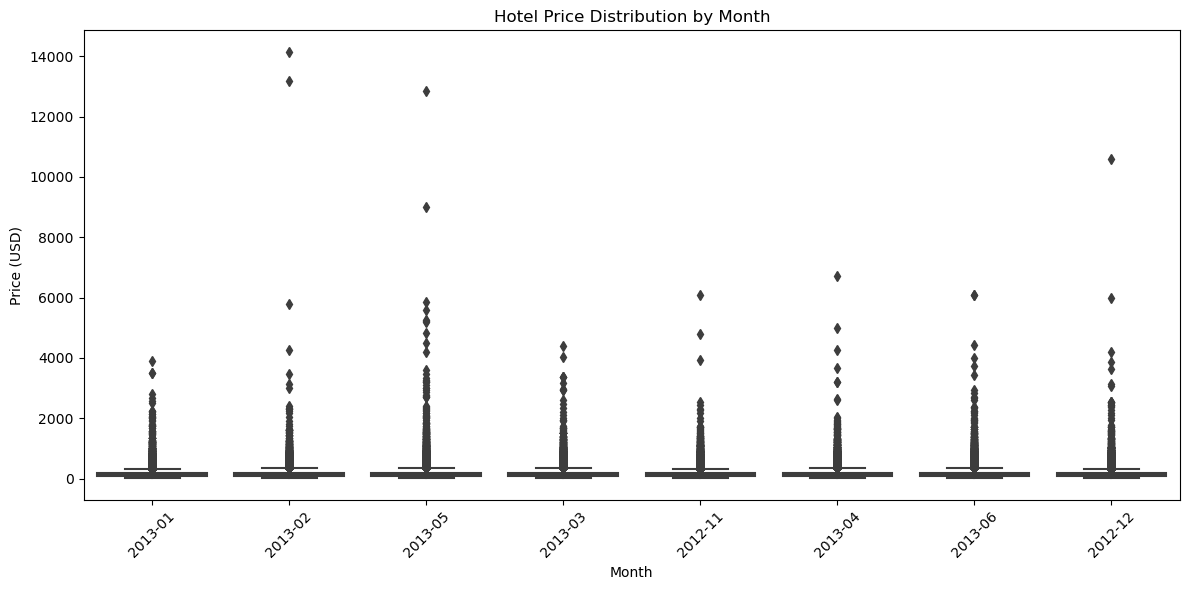

In [87]:
train_df["year_month"] = train_df["date_time"].dt.to_period("M")
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x="year_month", y="price_usd")

plt.xlabel("Month")
plt.ylabel("Price (USD)")
plt.title("Hotel Price Distribution by Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

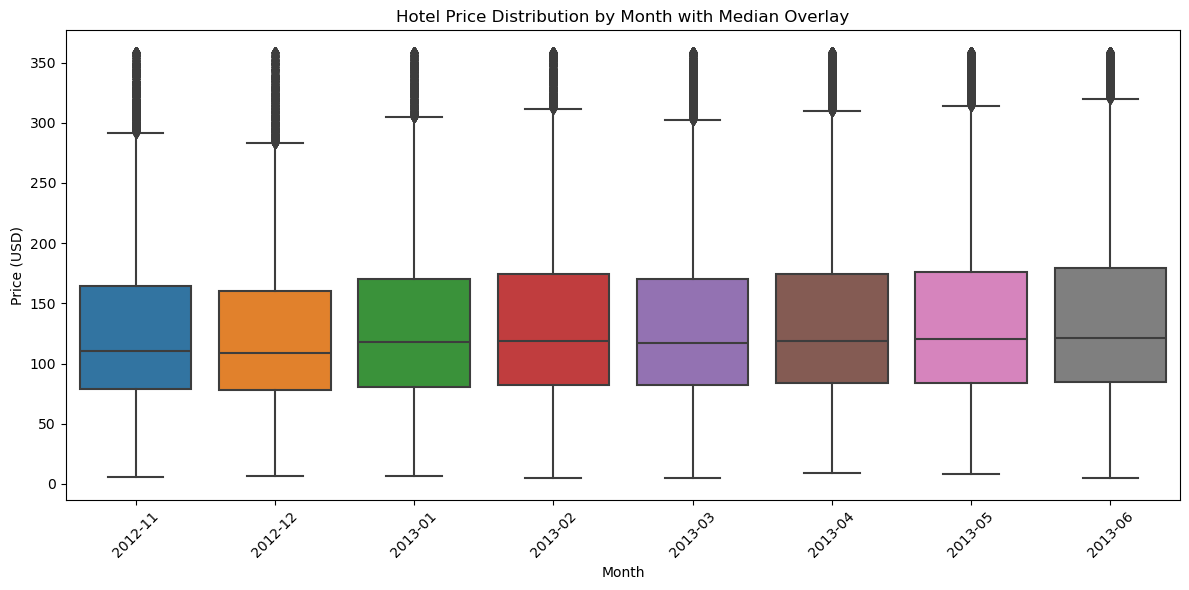

In [96]:
p95 = train_df["price_usd"].quantile(0.95)
filtered_df = train_df[train_df["price_usd"] <= p95].copy()

filtered_df["year_month"] = filtered_df["date_time"].dt.to_period("M").astype(str)
ordered_months = sorted(filtered_df["year_month"].unique())

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_df,
    x="year_month",
    y="price_usd",
    order=ordered_months
)

plt.xlabel("Month")
plt.ylabel("Price (USD)")
plt.title("Hotel Price Distribution by Month with Median Overlay")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


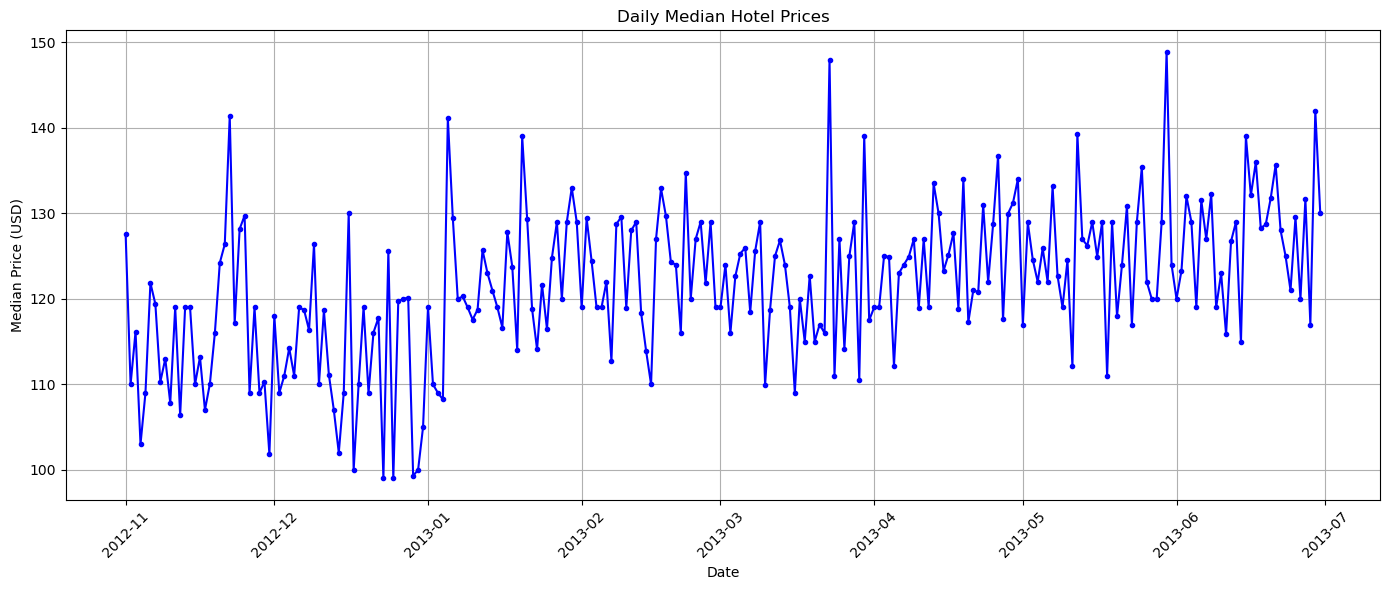

In [99]:
train_df["date"] = train_df["date_time"].dt.date
daily_median = train_df.groupby("date")["price_usd"].median().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_median["date"], daily_median["price_usd"], color='blue', marker='.', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Median Price (USD)")
plt.title("Daily Median Hotel Prices")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Does there exist colinearity between the covariates?

In [9]:
train_df[["visitor_hist_adr_usd",
         "prop_review_score", "prop_log_historical_price",
          "srch_length_of_stay", 'srch_booking_window', 
          'srch_adults_count', 'srch_children_count',
          'srch_room_count', "price_usd"]].corr()

,visitor_hist_adr_usd,prop_review_score,prop_log_historical_price,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,price_usd
visitor_hist_adr_usd,1.000000,0.046059,0.027308,0.076654,0.103374,0.028143,0.064062,0.009307,0.183190
prop_review_score,0.046059,1.000000,0.122384,-0.001431,0.012994,0.028337,0.012869,0.028899,0.176009
prop_log_historical_price,0.027308,0.122384,1.000000,0.036171,0.061831,-0.004357,-0.026269,-0.009942,0.126475
srch_length_of_stay,0.076654,-0.001431,0.036171,1.000000,0.156515,0.039670,0.045024,0.006089,0.093158
srch_booking_window,0.103374,0.012994,0.061831,0.156515,1.000000,0.166654,0.118994,0.010247,0.112162
srch_adults_count,0.028143,0.028337,-0.004357,0.039670,0.166654,1.000000,0.059961,0.486858,0.065193
srch_children_count,0.064062,0.012869,-0.026269,0.045024,0.118994,0.059961,1.000000,0.095050,0.053364
srch_room_count,0.009307,0.028899,-0.009942,0.006089,0.010247,0.486858,0.095050,1.000000,0.017060
price_usd,0.183190,0.176009,0.126475,0.093158,0.112162,0.065193,0.053364,0.017060,1.000000


No obvious correlation between covariates. 

Notable Entries:
- The number of adult counts have a 0.487 correlation with number of rooms requested.

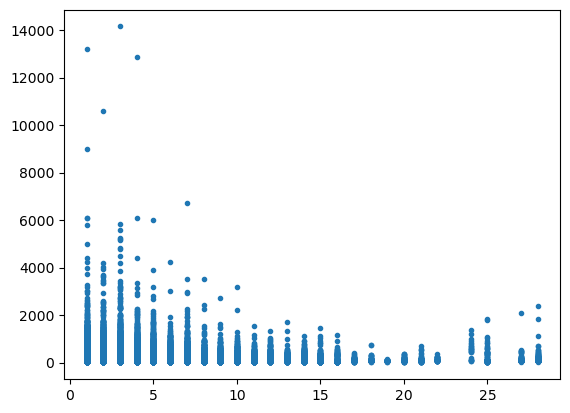

In [55]:
plt.plot(train_df["srch_length_of_stay"], train_df["price_usd"], ".")

It seems like price_usd is not the total price, but the price per room. Since the right tail is relatively even while there is some variance with individuals who searched for 1-3 rooms. What may have caused the high variance in prices for the observations where 1 room was requests? What causes differences in high priced rooms?

#### Exploring the impact of location on price

In [52]:
expensive_rooms = train_df[(train_df["prop_log_historical_price"] > train_df["prop_log_historical_price"].quantile(0.8))]
cheap_rooms = train_df[(train_df["prop_log_historical_price"] < train_df["prop_log_historical_price"].quantile(0.2))]
print (f"There are {expensive_rooms.shape[0]} observations with prices above 75th percentile.")
print (f"There are {cheap_rooms.shape[0]} observations with prices below 25th percentile.")

There are 101324 observations with prices above 75th percentile.
There are 101134 observations with prices below 25th percentile.


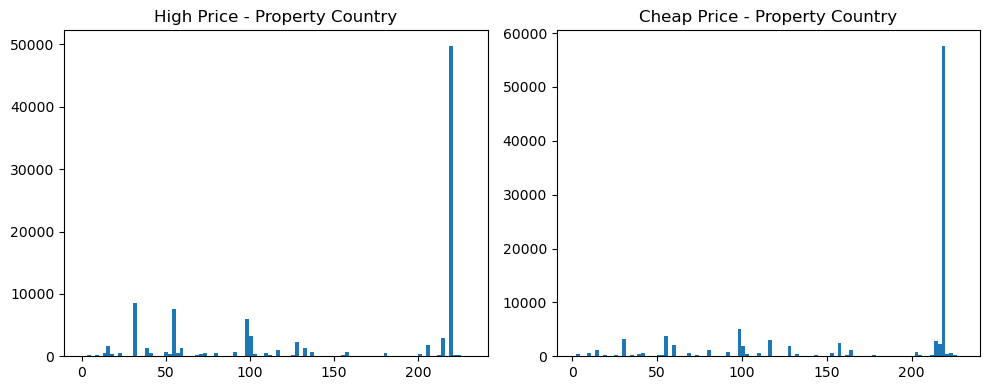

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(expensive_rooms["prop_country_id"], bins = 100)
axs[0].set_title("High Price - Property Country")

axs[1].hist(cheap_rooms["prop_country_id"], bins = 100)
axs[1].set_title("Cheap Price - Property Country")

plt.tight_layout()
plt.show()

In [50]:
hotel_counts = train_df.groupby("prop_country_id")["prop_id"].nunique()
hotel_counts.sort_values(ascending=False)

prop_country_id
219    32340
31      7081
55      4807
99      4688
215     3281
       ...  
226        5
19         5
184        3
165        2
208        2
Name: prop_id, Length: 156, dtype: int64

In [54]:
# What are the historcially cheaper locations and where are the more expensive locations?
exp_counts = expensive_rooms["prop_country_id"].value_counts()
cheap_counts = cheap_rooms["prop_country_id"].value_counts()
normalized_exp = (exp_counts / hotel_counts).dropna()
normalized_cheap = (cheap_counts / hotel_counts).dropna()
ratio = (normalized_exp / normalized_cheap).dropna()

extreme_ratios = ratio[(ratio > 4) | (ratio < 0.25)]
extreme_ratios = pd.DataFrame(extreme_ratios.sort_values())

print(extreme_ratios)

                         0
prop_country_id           
106               0.037736
229               0.054187
91                0.075000
222               0.076923
154               0.085938
182               0.088889
44                0.111111
164               0.111732
102               0.137931
11                0.140351
10                0.187500
140               0.200000
158               0.236414
113               4.300000
63                4.714286
97                4.800000
124               5.000000
205               5.002597
137               5.828125
169               7.500000
127               7.758621
189               8.000000
119               8.444444
27                9.222222
136              10.000000
65               10.000000
155              12.000000
186              14.400000
20               15.400000
214              19.250000
40               21.333333
80               21.678571
156              22.500000
30               24.000000
96               79.000000


If the ratio is high, that means that there are more expensive hotels (above 80th percentile for log mean historical price) than cheap hotels (below 20th percentile for log mean historical price) in that location. Therefore, it may be crucial to convert the top 10 and the lower 10 countries into dummy variables in the linear regression stage and/or conduct a causal analysis of where being in these countries causes prices to increase. From the data description, we learned that different countries have different conventions regarding displaying taxes and fees and the value may be per night or for the whole stay. Therefore, could these countries be displaying their prices as a total value rather than price per night?

In [82]:
high_price = train_df.loc[train_df["price_usd"] > train_df["price_usd"].quantile(0.9)]
high_price[["prop_country_id"]].value_counts()

prop_country_id
219                22081
55                  4237
31                  3507
99                  2890
220                 1959
                   ...  
208                    1
128                    1
10                     1
124                    1
46                     1
Name: count, Length: 138, dtype: int64

It seems interesting that the price outliers does not correspond with countries that have high or low price ratios. 

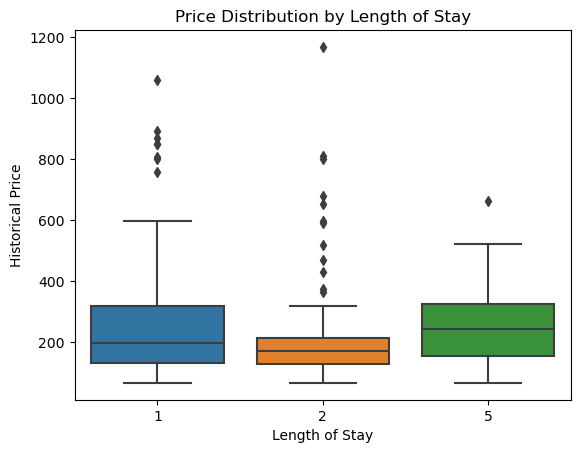

In [79]:
country_code = 30
country_price = train_df.loc[train_df["prop_country_id"] == country_code]

sns.boxplot(data=country_price, x="srch_length_of_stay", y="price_usd")
plt.title("Price Distribution by Length of Stay")
plt.xlabel("Length of Stay")
plt.ylabel("Historical Price")
plt.show()

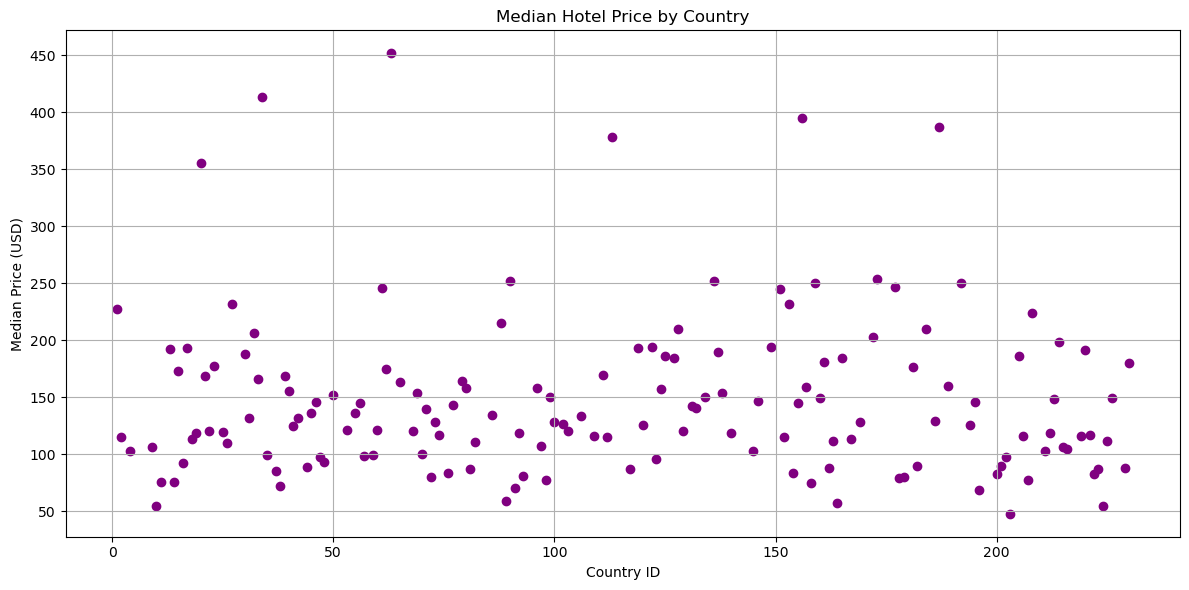

In [106]:
country_medians = (train_df.groupby("prop_country_id")["price_usd"].median().reset_index()
                   .rename(columns={"price_usd": "median_price"})
                   .set_index('prop_country_id')
)

plt.figure(figsize=(12, 6))
plt.scatter(country_medians.index, country_medians["median_price"], color='purple')

plt.xlabel("Country ID")
plt.ylabel("Median Price (USD)")
plt.title("Median Hotel Price by Country")
plt.grid(True)
plt.tight_layout()
plt.show()

When we aggregate based on country, it seems relatively consistent, so if we include country in our regression as a control, we can account for the fundamental differences between the various countries.

In [113]:
hist_price_P90 = train_df['prop_log_historical_price'].quantile(0.9)
histcountry_medians = (train_df.groupby("prop_country_id")["prop_log_historical_price"].median().reset_index()
                   .rename(columns={"prop_log_historical_price": "median_hist_price"})
                   .set_index('prop_country_id')
)

train_df['hist_med_price_90th'] = train_df['prop_country_id'].map(
    lambda x: histcountry_medians.loc[x, 'median_hist_price'] > hist_price_P90 
    if x in histcountry_medians.index else False
)

# Step 4: Convert the boolean to int (0 or 1)
train_df['hist_med_price_90th'] = train_df['hist_med_price_90th'].astype(int)

In [114]:
train_df.head()

,srch_id,visitor_location_country_id,visitor_hist_adr_usd,prop_id,prop_country_id,prop_review_score,price_usd,prop_log_historical_price,date_time,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_destination_id,srch_room_count,year_month,date,med_price_above_90th,hist_med_price_90th
0,47,100,180.75,6618,137,4.0,118.94,4.78,2013-01-14 22:28:43,6,3,1,1,13901,1,2013-01,2013-01-14,0,0
1,47,100,180.75,11747,137,4.5,113.86,5.34,2013-01-14 22:28:43,6,3,1,1,13901,1,2013-01,2013-01-14,0,0
2,47,100,180.75,18311,137,4.0,129.10,5.44,2013-01-14 22:28:43,6,3,1,1,13901,1,2013-01,2013-01-14,0,0
3,47,100,180.75,19599,137,4.0,94.54,5.03,2013-01-14 22:28:43,6,3,1,1,13901,1,2013-01,2013-01-14,0,0
4,47,100,180.75,24002,137,4.5,185.02,5.60,2013-01-14 22:28:43,6,3,1,1,13901,1,2013-01,2013-01-14,0,0


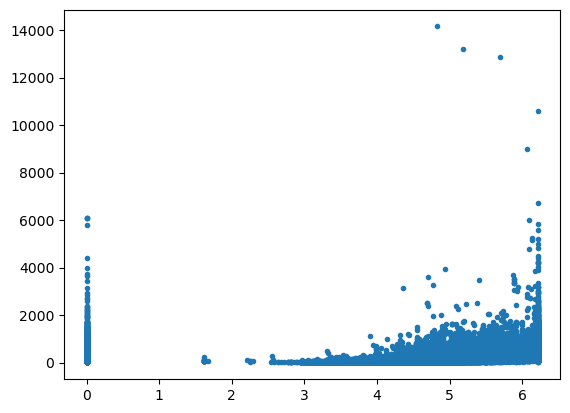

In [84]:
plt.plot(train_df["prop_log_historical_price"], train_df["price_usd"], ".")